In [1]:
import numpy as np
import pandas as pd
import os
from scipy. stats import t
from scipy.stats import f
import math
from statsmodels.compat import lzip

from sklearn.decomposition import PCA
import statsmodels.api as sm
import statsmodels.regression.linear_model as sm_reg
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from scipy.stats import chi2
import statsmodels.stats.diagnostic as sm_diagnostic # тест Бройша-Пагана

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_watches.csv')
df

,Цена,Объем постоянной памяти,Сенсорный дисплей,Яркость,Управление музыкальным плеером,Функция поиска смартфона,Емкость аккумулятора,"Время работы в режиме ожидания, до","Время работы в обычном режиме, до",Вес,...,Датчик снятия с руки,Премиальный Бренд,Длина,Ширина,Высота,Размер дисплея,Разрешение дисплея 1,Разрешение дисплея 2,Название,Ссылка
0,7990.0,0.130,1.0,2000.0,1.0,0.0,300.000000,240.0,120.0,26.0,...,0.0,0.0,38.09,45.94,11.2,1.91,320.0,380.0,"Смарт-часы AMAZFIT Bip 5 A2215, 1.91"", розовый",https://www.citilink.ru/product/smart-chasy-am...
1,7990.0,0.130,1.0,2000.0,1.0,0.0,300.000000,240.0,120.0,26.0,...,0.0,0.0,38.09,45.94,11.2,1.91,320.0,380.0,"Смарт-часы AMAZFIT Bip 5 A2215, 1.91"", белый",https://www.citilink.ru/product/smart-chasy-am...
2,126990.0,16.000,1.0,2000.0,1.0,1.0,401.302885,384.0,75.0,70.0,...,0.0,0.0,47.00,47.00,14.5,1.30,416.0,416.0,"Смарт-часы Garmin Epix Gen 2 Sapphire, 33.02м...",https://www.citilink.ru/product/smart-chasy-ga...
3,123990.0,16.000,1.0,2000.0,1.0,1.0,401.302885,384.0,75.0,70.0,...,0.0,0.0,47.00,47.00,14.5,1.30,416.0,416.0,"Смарт-часы Garmin Epix Gen 2 Sapphire, 33.02м...",https://www.citilink.ru/product/smart-chasy-ga...
4,62990.0,16.000,1.0,2000.0,1.0,1.0,401.302885,216.0,24.0,51.0,...,0.0,0.0,43.60,43.60,12.6,1.30,416.0,416.0,"Смарт-часы Garmin Venu 2 Plus, 33мм, 1.3"", ...",https://www.citilink.ru/product/smart-chasy-ga...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,4999.0,4.000,1.0,2000.0,0.0,0.0,750.000000,96.0,48.0,50.0,...,0.0,0.0,41.00,46.00,16.0,1.30,240.0,240.0,"Смарт-часы Кнопка Жизни Aimoto Integra 4G, 1....",https://www.citilink.ru/product/smart-chasy-kn...
218,3999.0,0.128,1.0,2000.0,0.0,0.0,750.000000,120.0,72.0,50.0,...,0.0,0.0,40.00,48.00,16.0,1.40,240.0,240.0,"Смарт-часы Кнопка Жизни Aimoto Pro 4G, 1.4"", ...",https://www.citilink.ru/product/smart-chasy-kn...
219,999.0,0.032,1.0,2000.0,0.0,0.0,350.000000,96.0,48.0,45.0,...,0.0,0.0,40.00,45.00,14.0,1.44,128.0,128.0,"Смарт-часы Кнопка Жизни Aimoto Lite, 1.44"", ...",https://www.citilink.ru/product/smart-chasy-kn...
220,4310.0,0.030,1.0,2000.0,0.0,0.0,400.000000,72.0,24.0,48.0,...,0.0,0.0,40.00,50.00,15.0,1.44,240.0,240.0,Смарт-часы Кнопка Жизни Aimoto Disney «Холодно...,https://www.citilink.ru/product/smart-chasy-kn...


In [3]:
df.columns = [col.replace(' ', '_') for col in df.columns]

In [5]:
# Определение переменных

# Регрессоры
X = df.loc[:, ~df.columns.isin(['Название', 'Цена', 'Ссылка'])]
X['const'] = 1 # Добавление константы

# Описание всех переменных
descr = X.describe()

# Количественные переменные
quant_var = list(descr.loc['max', :][descr.loc['max', :] != 1].index)

# Dummy переменные
dummy_var = list(descr.loc['max', :][descr.loc['max', :] == 1].index)

# Целевая переменная - цена часов
y = df['Цена']

In [6]:
def hyph_check(pvalue):
    if  pvalue >= 0.05:
        print('Нулевая гипотеза не отвергается. ')
    else:
        print('Нулевая гипотеза отвергается')

# OLS

Построим сначал 3 спецификации модели

1) Линейная
2) Полулогарифмическая
3) Линейная в логарифмах

In [7]:
# Оценка МНК для линейной модели 
ols_lin = sm.OLS(y, X).fit()
 
# Вывод результатов модели
print(ols_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     13.77
Date:                Fri, 10 May 2024   Prob (F-statistic):           7.59e-30
Time:                        21:49:06   Log-Likelihood:                -2501.9
No. Observations:                 222   AIC:                             5052.
Df Residuals:                     198   BIC:                             5133.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Объе

In [8]:
# Оценка МНК для полулогарифмической модели 
ln_y = np.log(y)

ols_semilog = sm.OLS(ln_y, X).fit()
 
# Вывод результатов модели
print(ols_semilog.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     23.69
Date:                Fri, 10 May 2024   Prob (F-statistic):           7.67e-45
Time:                        21:49:06   Log-Likelihood:                -231.22
No. Observations:                 222   AIC:                             510.4
Df Residuals:                     198   BIC:                             592.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Объе

In [9]:
# Оценка МНК для линейной в логарифмах модели 
ln_X = np.log(X[quant_var])
ln_X = X[dummy_var]

ols_log = sm.OLS(ln_y, ln_X).fit()
 
# Вывод результатов модели
print(ols_log.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     11.39
Date:                Fri, 10 May 2024   Prob (F-statistic):           2.08e-13
Time:                        21:49:06   Log-Likelihood:                -338.48
No. Observations:                 222   AIC:                             695.0
Df Residuals:                     213   BIC:                             725.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Сенсорны

## Сравнение моделей

Для начала посмотрим на $R^2$ моделей. Полулогарифмическую модель и линейную модель в логарифмах можно сравнить по нормированному $R^2$, так как в этих моделях одинаковые зависимые переменные ($\ln{Y}$)

In [10]:
print(f'Нормированный R2 у полулогарифмической модели: {ols_semilog.rsquared_adj:.3f}')
print(f'Нормированный R2 у линейной в логарифмах модели: {ols_log.rsquared_adj:.3f}')

Нормированный R2 у полулогарифмической модели: 0.703
Нормированный R2 у линейной в логарифмах модели: 0.273


**Вывод:** Как видим, у полулогарфическую модели нормированный $ R^2 $ больше. Значит линейную в логарифмах модель можно более не рассматривать.

Теперь выберем лучшую модель через метод Зарембки (частный случай преобразования Бокса-Кокса).

$$ g = \sqrt[n]{Y_1 \cdot Y_2 \cdot \ldots \cdot Y_n} $$
$$ Y^* = Y / g $$
$$ Y^* = \tilde{\alpha} + \tilde{\beta}X + \tilde{\varepsilon} \quad (1) $$
$$ \log{Y^*} = \tilde{\alpha}' + \tilde{\beta}'X + \tilde{\varepsilon}' \quad (2) $$
 
И далее рассчитывается следующая статистика
Для этого считаем $\chi^2$ по формуле:

$$
\chi^2 = \frac{n}{2}|\ln{\frac{RSS_1}{RSS_2}}| \\
$$

$H0:$ качество подгонки линейной и полулогарифмической моделей одинаковое

$H1:$ модель с меньшей RSS лучше

In [11]:
# геометрическое среднее зарплаты
g_wage = math.exp(np.mean(np.log(y)))
y_z = y/g_wage

ols_lin_z = sm.OLS(y_z, X).fit()
ols_semilog_z = sm.OLS(np.log(y_z), X).fit()

xi_2 = len(X)/2*abs(np.log(ols_lin_z.ssr/ols_semilog_z.ssr)) # значение тестовой статистики
print("Наблюдаемое значение статистики =", round(xi_2, 2))
xi_crit = chi2.ppf(0.95, 1) # критическое значение
print("Критическое значение статистики =", round(xi_crit, 2)) 

Наблюдаемое значение статистики = 210.56
Критическое значение статистики = 3.84


Так как наблюдаемое значение статистики больше критического, то на 5% уровне мы отвергаем гипотезу H0, то есть модели имеют разное качество подгонки. Значит выберем ту модель, у которой ниже RSS

In [12]:
# Выбор модели производится бы на основе RSS (чем RSS меньше, тем лучше)
print("RSS для линейной модели =", round(ols_lin_z.ssr, 2)) 
print("RSS для полулогарифмической модели =", round(ols_semilog_z.ssr, 2))

RSS для линейной модели = 695.63
RSS для полулогарифмической модели = 104.36


**Вывод:** Выбираем полулогарифмическую модель

In [13]:
model = ols_semilog

## Проверка на наличие выбросов

Для выявления аномальных наблюдений возьмём 2 следующиющих критерия: выявим выбросы через DFFITS и через стьюдентизированные остатки.

In [14]:
# Анализ выбросов с помощью DFFITS
influence = model.get_influence()
dffits = np.array(influence.dffits[0])

# пороговое значение для DFFITS: cutoff = 2*sqrt(k/n)
cutoff_dffits = 2*math.sqrt(X.shape[1]/X.shape[0])

# Выведем наблюдения, являющиеся влиятельными согласно DFFITS
df[abs(dffits) > cutoff_dffits]

,Цена,Объем_постоянной_памяти,Сенсорный_дисплей,Яркость,Управление_музыкальным_плеером,Функция_поиска_смартфона,Емкость_аккумулятора,"Время_работы_в_режиме_ожидания,_до","Время_работы_в_обычном_режиме,_до",Вес,...,Датчик_снятия_с_руки,Премиальный_Бренд,Длина,Ширина,Высота,Размер_дисплея,Разрешение_дисплея_1,Разрешение_дисплея_2,Название,Ссылка
12,6170.0,16.000000,1.0,2000.0,1.0,0.0,280.000000,240.000000,60.000000,100.00,...,0.0,0.0,45.70,45.70,13.00,1.32,360.0,360.0,"Смарт-часы ARK Kieslect Lady Lora, 45.7мм, 1...",https://www.citilink.ru/product/smart-chasy-ar...
34,29999.0,32.000000,1.0,2000.0,1.0,0.0,780.000000,504.000000,120.000000,65.00,...,0.0,1.0,48.00,48.00,12.90,1.50,466.0,466.0,"Смарт-часы Huawei Watch 4 Pro Medes-L19L, 1.5...",https://www.citilink.ru/product/smart-chasy-hu...
61,6780.0,16.000000,0.0,2000.0,0.0,0.0,320.000000,288.000000,114.571429,55.48,...,0.0,0.0,45.50,45.50,10.80,1.43,466.0,466.0,"Смарт-часы AMAZFIT Pop 3R A2319, 1.43"", сере...",https://www.citilink.ru/product/smart-chasy-am...
88,690.0,16.000000,0.0,2000.0,0.0,0.0,90.000000,290.547085,114.571429,30.00,...,0.0,0.0,36.00,250.00,13.00,1.30,240.0,240.0,"Смарт-часы Digma Smartline R1, 1.3"", черный",https://www.citilink.ru/product/smart-chasy-di...
98,3540.0,0.000512,1.0,2000.0,0.0,0.0,155.000000,240.000000,96.000000,35.00,...,0.0,0.0,83.00,42.50,10.70,1.30,240.0,240.0,"Смарт-часы Canyon Lollypop 42.5мм, 1.3"", черный",https://www.citilink.ru/product/smart-chasy-ca...
100,690.0,16.000000,0.0,2000.0,0.0,0.0,90.000000,290.547085,114.571429,28.00,...,0.0,0.0,36.00,250.00,14.00,1.30,240.0,240.0,"Смарт-часы Digma Smartline H2, 1.3"", черный",https://www.citilink.ru/product/smart-chasy-di...
106,1590.0,0.000512,1.0,2000.0,0.0,0.0,155.000000,240.000000,96.000000,35.00,...,0.0,0.0,83.00,42.50,10.70,1.30,240.0,240.0,"Смарт-часы Canyon Lollypop 42.5мм, 1.3"", роз...",https://www.citilink.ru/product/smart-chasy-ca...
113,10999.0,16.000000,1.0,2000.0,0.0,0.0,250.000000,576.000000,336.000000,39.10,...,1.0,0.0,36.00,42.40,8.80,1.75,390.0,450.0,"Смарт-часы AMAZFIT GTS 3 A2035, 1.75"", розовый",https://www.citilink.ru/product/smart-chasy-am...
114,3999.0,16.000000,1.0,500.0,1.0,0.0,280.000000,720.000000,123.000000,45.00,...,0.0,0.0,40.09,246.64,12.17,1.83,240.0,284.0,"Смарт-часы INFINIX XW1, 40мм, 1.83"", черный",https://www.citilink.ru/product/smart-chasy-in...
122,5300.0,16.000000,1.0,2000.0,0.0,0.0,180.000000,290.547085,240.000000,58.00,...,0.0,0.0,45.00,230.00,12.00,1.44,240.0,240.0,"Смарт-часы Lenovo E1 Pro L-SMW101, 1.44"", че...",https://www.citilink.ru/product/smart-chasy-le...


In [15]:
# Теперь найдем выбросы с помощью стьюдентизированных остатков
student_resid = influence.resid_studentized_external

# пороговое значение для стьюдентизированных остатков
crit = t(df=X.shape[0]-X.shape[1]).ppf((0.95))

# Выведем наблюдения, являющиеся влиятельными согласно DFFITS
df[abs(student_resid) > crit]

,Цена,Объем_постоянной_памяти,Сенсорный_дисплей,Яркость,Управление_музыкальным_плеером,Функция_поиска_смартфона,Емкость_аккумулятора,"Время_работы_в_режиме_ожидания,_до","Время_работы_в_обычном_режиме,_до",Вес,...,Датчик_снятия_с_руки,Премиальный_Бренд,Длина,Ширина,Высота,Размер_дисплея,Разрешение_дисплея_1,Разрешение_дисплея_2,Название,Ссылка
12,6170.0,16.000000,1.0,2000.0,1.0,0.0,280.000000,240.000000,60.000000,100.00,...,0.0,0.0,45.7,45.7,13.00,1.32,360.0,360.0,"Смарт-часы ARK Kieslect Lady Lora, 45.7мм, 1...",https://www.citilink.ru/product/smart-chasy-ar...
61,6780.0,16.000000,0.0,2000.0,0.0,0.0,320.000000,288.000000,114.571429,55.48,...,0.0,0.0,45.5,45.5,10.80,1.43,466.0,466.0,"Смарт-часы AMAZFIT Pop 3R A2319, 1.43"", сере...",https://www.citilink.ru/product/smart-chasy-am...
88,690.0,16.000000,0.0,2000.0,0.0,0.0,90.000000,290.547085,114.571429,30.00,...,0.0,0.0,36.0,250.0,13.00,1.30,240.0,240.0,"Смарт-часы Digma Smartline R1, 1.3"", черный",https://www.citilink.ru/product/smart-chasy-di...
98,3540.0,0.000512,1.0,2000.0,0.0,0.0,155.000000,240.000000,96.000000,35.00,...,0.0,0.0,83.0,42.5,10.70,1.30,240.0,240.0,"Смарт-часы Canyon Lollypop 42.5мм, 1.3"", черный",https://www.citilink.ru/product/smart-chasy-ca...
100,690.0,16.000000,0.0,2000.0,0.0,0.0,90.000000,290.547085,114.571429,28.00,...,0.0,0.0,36.0,250.0,14.00,1.30,240.0,240.0,"Смарт-часы Digma Smartline H2, 1.3"", черный",https://www.citilink.ru/product/smart-chasy-di...
106,1590.0,0.000512,1.0,2000.0,0.0,0.0,155.000000,240.000000,96.000000,35.00,...,0.0,0.0,83.0,42.5,10.70,1.30,240.0,240.0,"Смарт-часы Canyon Lollypop 42.5мм, 1.3"", роз...",https://www.citilink.ru/product/smart-chasy-ca...
122,5300.0,16.000000,1.0,2000.0,0.0,0.0,180.000000,290.547085,240.000000,58.00,...,0.0,0.0,45.0,230.0,12.00,1.44,240.0,240.0,"Смарт-часы Lenovo E1 Pro L-SMW101, 1.44"", че...",https://www.citilink.ru/product/smart-chasy-le...
128,1299.0,16.000000,1.0,2000.0,1.0,1.0,140.000000,290.547085,114.571429,45.00,...,0.0,0.0,3.6,25.0,1.50,0.54,240.0,240.0,"Смарт-часы SunWind SW30, 1.54"", черный",https://www.citilink.ru/product/smart-chasy-su...
142,5860.0,16.000000,1.0,2000.0,0.0,0.0,160.000000,290.547085,168.000000,31.00,...,0.0,0.0,36.2,40.5,118.00,1.40,320.0,320.0,"Смарт-часы REALME Watch 35мм, 1.4"", черный",https://www.citilink.ru/product/smart-chasy-re...
143,19990.0,32.000000,1.0,600.0,1.0,0.0,495.000000,290.547085,65.000000,36.80,...,0.0,1.0,47.5,45.9,11.80,1.43,466.0,466.0,"Смарт-часы Xiaomi Watch 2 46мм, 1.43"", черный",https://www.citilink.ru/product/smart-chasy-xi...


Сохраним индексы выбросов

In [16]:
outliers = list(set(list(df[abs(dffits) > cutoff_dffits].index) + list(df[abs(student_resid) > crit].index)))
len(outliers)

25

Всего получилось 25 выбросов. Попробуем удалить эти наблюдения и сравнить результаты моделей с выбросами и без выбросов

In [17]:
ln_y.drop(index=outliers, inplace=True)
X.drop(index=outliers, inplace=True)

In [18]:
# Модель с выбросами
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     23.69
Date:                Fri, 10 May 2024   Prob (F-statistic):           7.67e-45
Time:                        21:49:07   Log-Likelihood:                -231.22
No. Observations:                 222   AIC:                             510.4
Df Residuals:                     198   BIC:                             592.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Объе

In [19]:
# Модель без выбросов
model_2 = sm.OLS(ln_y, X).fit()
 
# Вывод результатов модели
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     45.45
Date:                Fri, 10 May 2024   Prob (F-statistic):           3.44e-61
Time:                        21:49:07   Log-Likelihood:                -135.72
No. Observations:                 197   AIC:                             319.4
Df Residuals:                     173   BIC:                             398.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Объе

**Вывод:** Нормированный R2 сильно вырос, а AIC и BIC упали, значит далее будем работать с моделью без выбросов

In [20]:
model = model_2

## Подбор набора объясняющих переменных

Для проверка правильности спецификации модели будем использовать тест Рамсея c 1 вспомогательными регрессором

Тест Рамсея отвечает на вопрос, надо ли включать в модель степени независимых переменных

$H0:$ спецификация модели является правильной

$H1:$ спецификация модели является неправильной

Алгоритм теста Рамсея:

1) Оценка основной модели

2) Оценка новой модели следующего вида (один вспомогательный регрессор)

$$ 
Y = \alpha + \beta_1X_1 + ... + \beta_kX_k + \alpha_2 \hat{Y}^2 +\varepsilon 
$$

3) Стандартный тест на значимость коэффициента в новой модели $ \hat{Y}^2 $. Будем использовать F-тест

In [21]:
X_reset = X.copy()
X_reset['fit_val'] = model.fittedvalues ** 2
m = 2

model_reset = sm.OLS(ln_y, X_reset).fit()

RSS_r = model.ssr
RSS_ur = model_reset.ssr

F_obs = ((RSS_r - RSS_ur)/(m-1))/(RSS_ur/(X.shape[0]-(X.shape[1] + m)))

print(f'F_obs = {F_obs:.3f}')

pvalue = 1 - f.cdf(F_obs, m - 1, X.shape[0]-(X.shape[1] + m))

print(f'p_value = {pvalue:.3f}')

hyph_check(pvalue)
print('Спецификация модели является правильной')

F_obs = 0.777
p_value = 0.379
Нулевая гипотеза не отвергается. 
Спецификация модели является правильной


## Проверим предпосылки ТГМ

### 1) Систематическая ошибка

Проверка наличия систематической ошибки


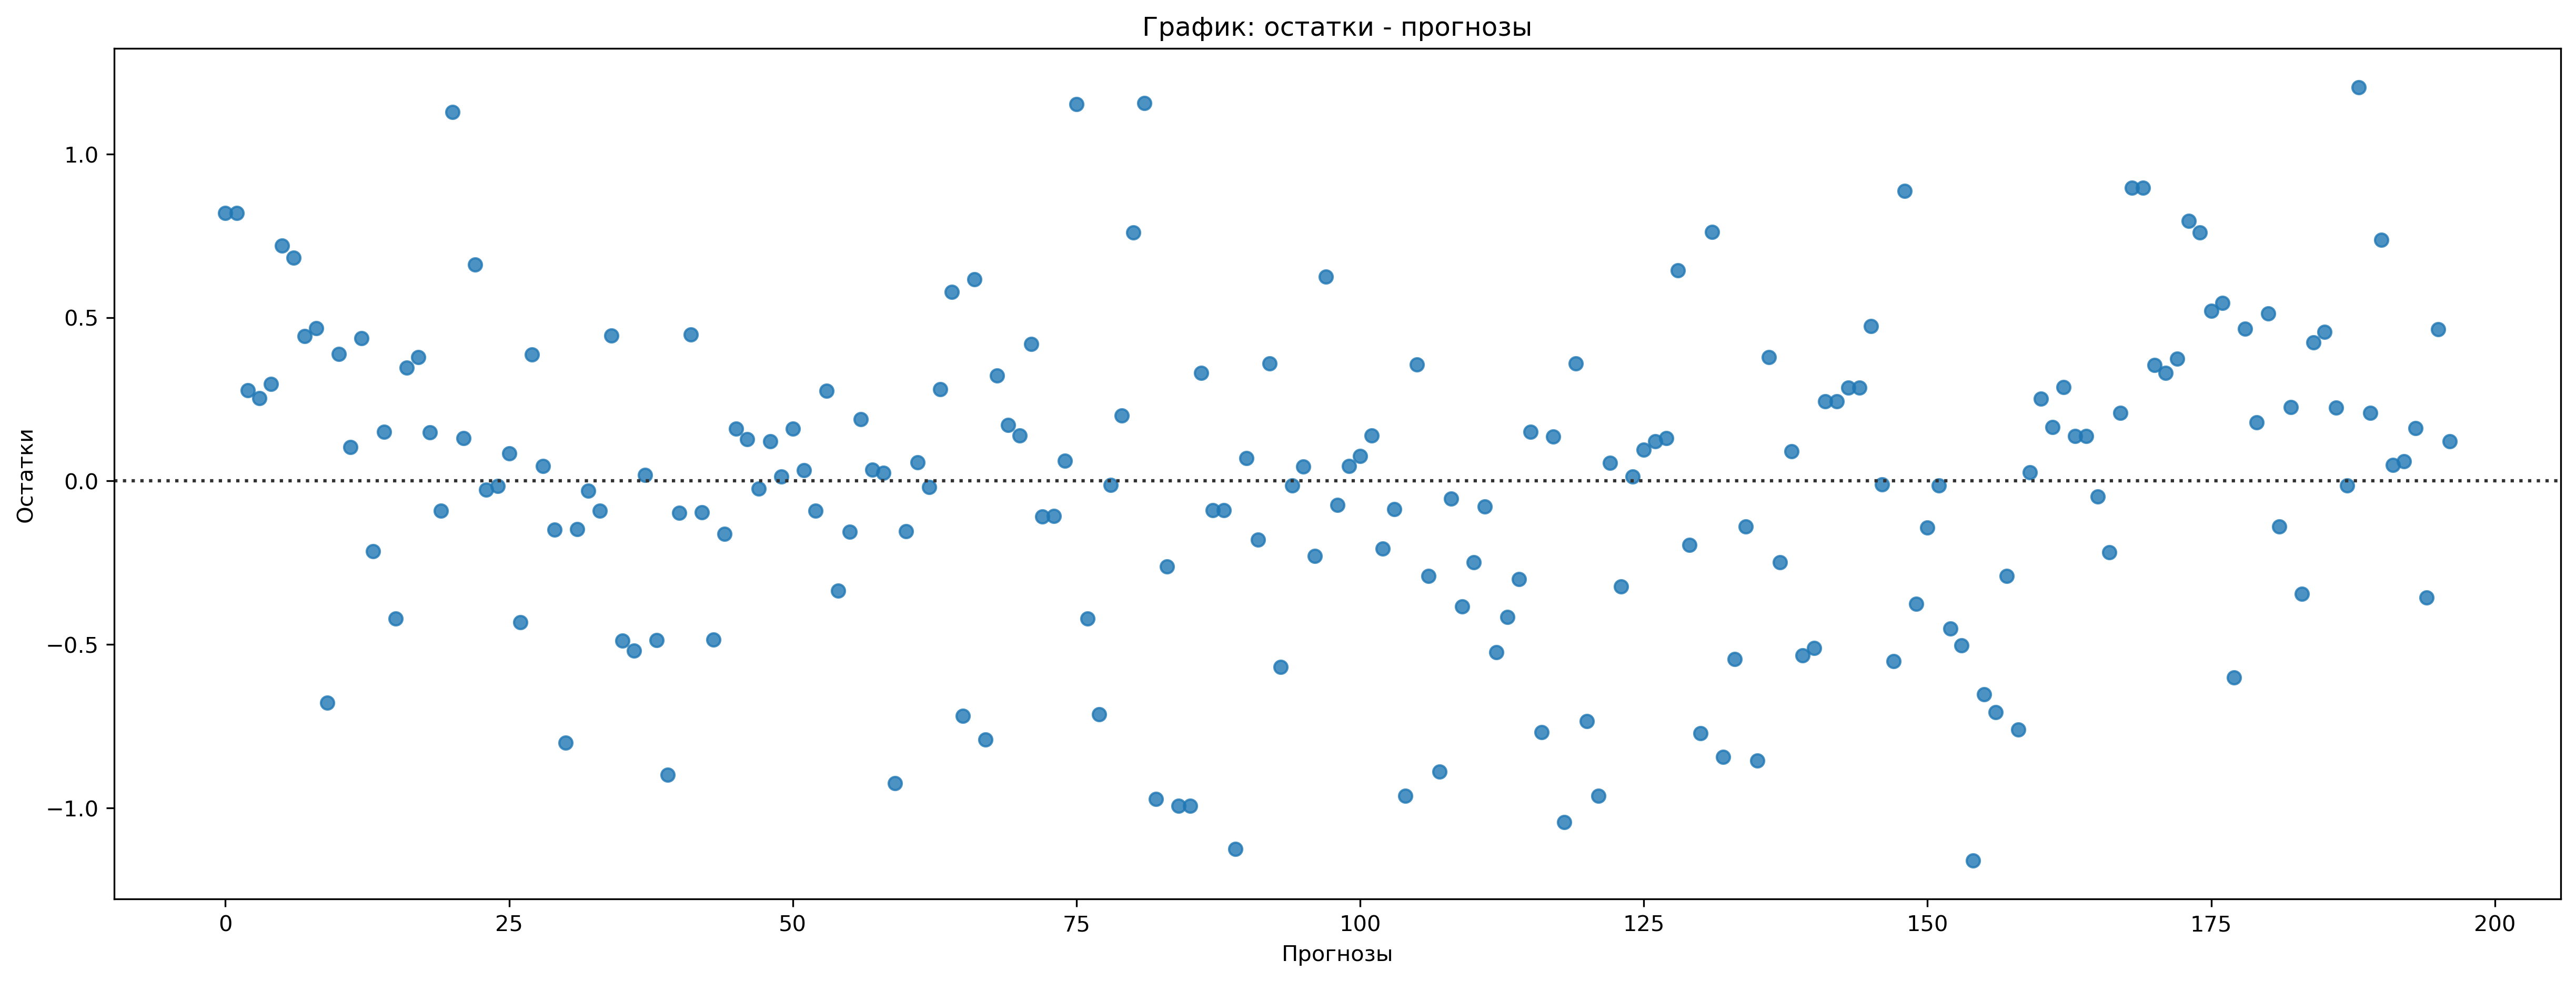

In [22]:
# Остатки
e = model.resid

# Построение диаграммы рассеяния с помощью seaborn
plt.figure(figsize = (20,7), dpi = 300)
sns.residplot(x=np.arange(len(X)), y=e)
plt.xlabel('Прогнозы')
plt.ylabel('Остатки')
plt.title(f'График: остатки - прогнозы');

**Вывод** Cистематической ошибки не наблюдается, так как значения колеблются вокруг нуля без смещения, значит первая предпосылка ТГМ не нарушена

### 2) Гомоскедастичность

Проверим трёмя способами:

**а) График остатки-прогнозы**

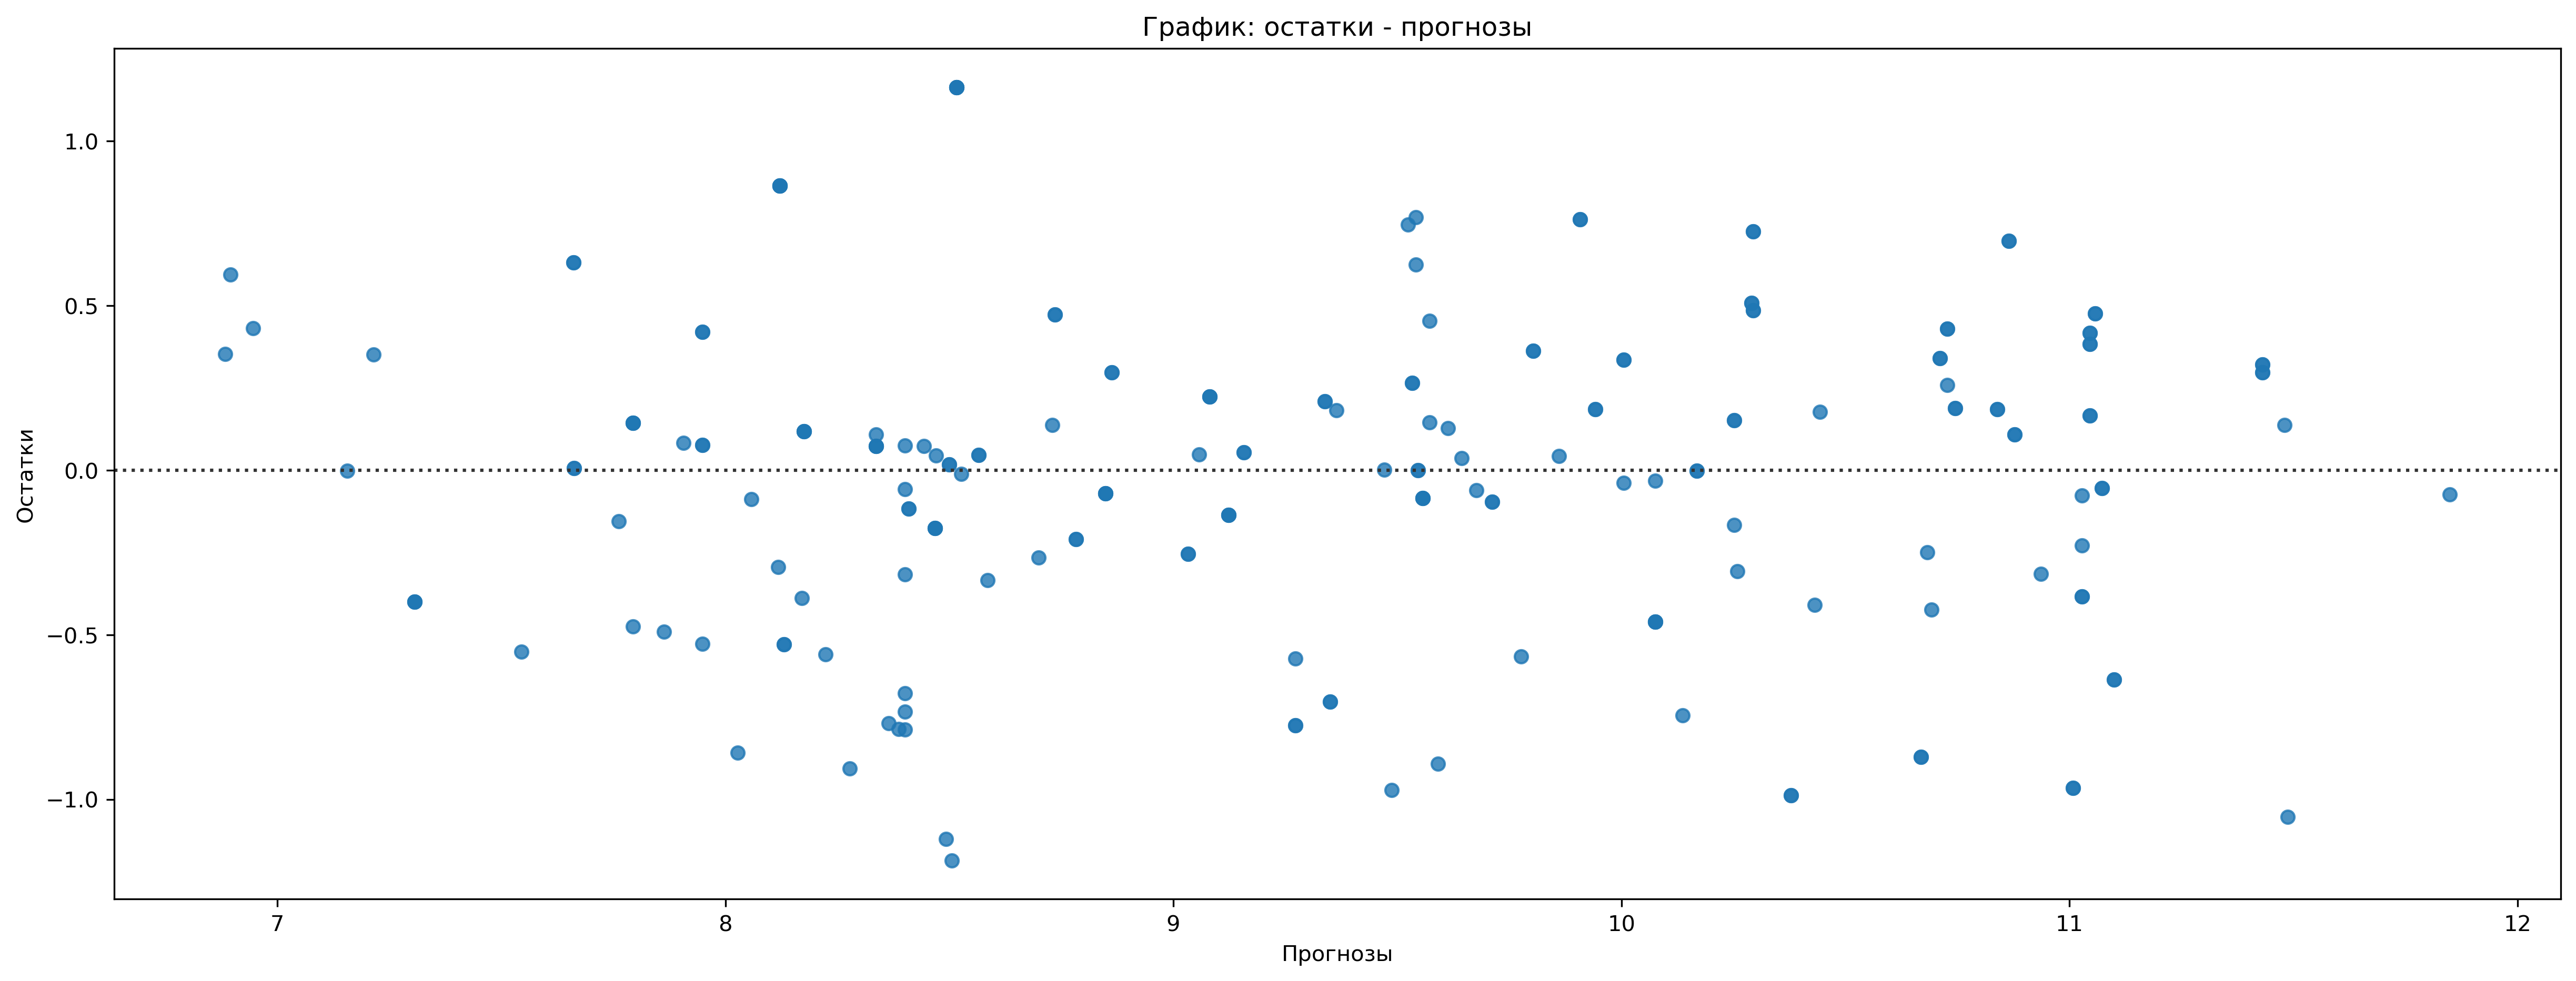

In [23]:
# Прогнозы
y_pred = model.fittedvalues

# Остатки
e = model.resid

# Построение диаграммы рассеяния с помощью seaborn
plt.figure(figsize = (20,7), dpi = 300)
sns.residplot(x=y_pred, y=e)
plt.xlabel('Прогнозы')
plt.ylabel('Остатки')
plt.title(f'График: остатки - прогнозы');

**Вывод:** Если приглядется, то можно увидеть некоторую взаимосвязь. Чем больше прогнозное значение, тем шире разброс остатков. Кажется есть гетероскедастичность. Причем заметим, что что остатки в среднем равны нулю, значит функциональная форма правильная

**б) Тест Бройша-Пагана**

$$ H0: гомоскедастичность $$
$$ H1: гетероскедастичность $$

Алгоритм Бройша-Пагана:

1) Оценка основной регрессии и запоминание остатков в данной модели

2) Вычисление оценки дисперсии для нормировки остатков:

$$
\hat{\sigma}^2 = \frac{\sum\limits_{i = 1}^{n}{e_i^2}}{n}
$$

3) Оценка новой регрессии:

$$
\frac{e^2}{\hat\sigma^2} = \gamma_0 + \gamma_1Z_1 + ... + \gamma_pZ_p + u
$$

4) При выполнении $H0$: $ESS/2 \sim \chi^2_p$

In [24]:
# Тест Бройша-Пагана
BP_test = sm_diagnostic.het_breuschpagan(resid=e, exog_het=X)

# Первое из выданных значений - значение тестовой статистики теста Бройша - Пагана, 
# Второе - значение p-value для выданной тестовой статистики. 
print(pd.DataFrame(lzip(['LM statistic', 'p-value'], BP_test)))

pvalue = BP_test[1]

hyph_check(pvalue)

              0             1
0  LM statistic  9.209990e+01
1       p-value  3.148991e-10
Нулевая гипотеза отвергается


**Вывод:** Тест Бройша-Пагана показал, что есть гетероскедастичность.

**в) Тест Уайта**

Проверим то же самое через тест Уайта. 

Алгоритм теста Уайта:

1) Оценка основной регрессии и запоминание остатков в данной модели

2) Оценка новой регрессии:

$$
e^2 = \alpha_1 + \sum\limits_{l = 2}^{k}{\alpha_lX_l} + \sum\limits_{l = 2}^{k}{\beta_{l2}X_l^2} + \sum\limits_{l, j = 2, \ l < j}^{k}{\gamma_{lj}X_lX_j} + u
$$

3) При выполнении $H0$: $nR^2 \sim \chi^2_{m - 1} $

In [25]:
# Тест Уайта
White_test = sm_diagnostic.het_white(resid=e, exog=X)

# Первое из выданных значений - значение тестовой статистики теста Уайта, 
# Второе - значение p-value для выданной тестовой статистики. 
print(pd.DataFrame(lzip(['LM statistic', 'p-value'], White_test)))

pvalue = White_test[1]

hyph_check(pvalue)

              0             1
0  LM statistic  1.897619e+02
1       p-value  3.054314e-07
Нулевая гипотеза отвергается


**Вывод:** Тесты Бройша-Пагана и тест Уайта показали, что в наших данных наблюдается гетероскедастичность.

Необходимо подкорректировать модель, чтобы избавиться от гетероскедастичности. Для этого воспользуемся доступным обобщённым МНК.y()

In [26]:
# Остатки
e = model.resid
abs_resid = abs(e)

# Взвешенный МНК
# Для начала оценим реегрессию модуля остатков на объём постоянной памяти

model_w = sm.OLS(abs_resid, X['Объем_постоянной_памяти']).fit()
print(model_w.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.432
Model:                            OLS   Adj. R-squared (uncentered):              0.429
Method:                 Least Squares   F-statistic:                              148.9
Date:                Fri, 10 May 2024   Prob (F-statistic):                    7.66e-26
Time:                        21:49:09   Log-Likelihood:                         -80.062
No. Observations:                 197   AIC:                                      162.1
Df Residuals:                     196   BIC:                                      165.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

Модель значима, так как p-value=0 в F-тесте. Значит можно применять эти остатки для подсчета весов

In [27]:
# Зададим веса
weight = model_w.predict()**2

# Оценим с помощью GLS (Feasible GLS) исходную модель регрессии
model_gls = sm.WLS(ln_y, X, weights = weight).fit()
print(model_gls.summary())

                            WLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.866
Model:                            WLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     48.75
Date:                Fri, 10 May 2024   Prob (F-statistic):           2.03e-63
Time:                        21:49:09   Log-Likelihood:                -353.74
No. Observations:                 197   AIC:                             755.5
Df Residuals:                     173   BIC:                             834.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Объе

Второй способ корректировки гетероскедастичности - использование робастных оценок, например, в форме Уайта.

In [28]:
model_robust = model.get_robustcov_results(cov_type = 'HC3')
print(model_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     7937.
Date:                Fri, 10 May 2024   Prob (F-statistic):          9.86e-249
Time:                        21:49:09   Log-Likelihood:                -135.72
No. Observations:                 197   AIC:                             319.4
Df Residuals:                     173   BIC:                             398.2
Df Model:                          23                                         
Covariance Type:                  HC3                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Объе

**Вывод:** Построены 2 модели, которые решают проблему гетероскедастичности. Далее будем использовать модель с использованием робастных оценок в форме Уайта, так как они показывают силььно лучше результат по AIC и BIC

In [29]:
model = model_robust

### 3) Мультиколлинеарность

Для того, чтобы понять, есть ли мультиколлинеарность, предлагаю сначала просто посмотреть на логичность знаков оценённых весов у каждого признака и на корреляционную матрицу факторов.

In [32]:
# Коэффициенты в модели
round(pd.Series(model.params), 2)

0     0.02
1    -2.05
2    -0.00
3     0.33
4     0.89
5    -0.00
6     0.00
7    -0.00
8     0.01
9    -0.00
10    0.00
11    0.00
12    0.40
13    0.77
14   -0.90
15   -0.42
16    0.17
17    0.05
18   -0.01
19    0.10
20   -0.88
21    0.00
22    0.00
23    6.84
dtype: float64

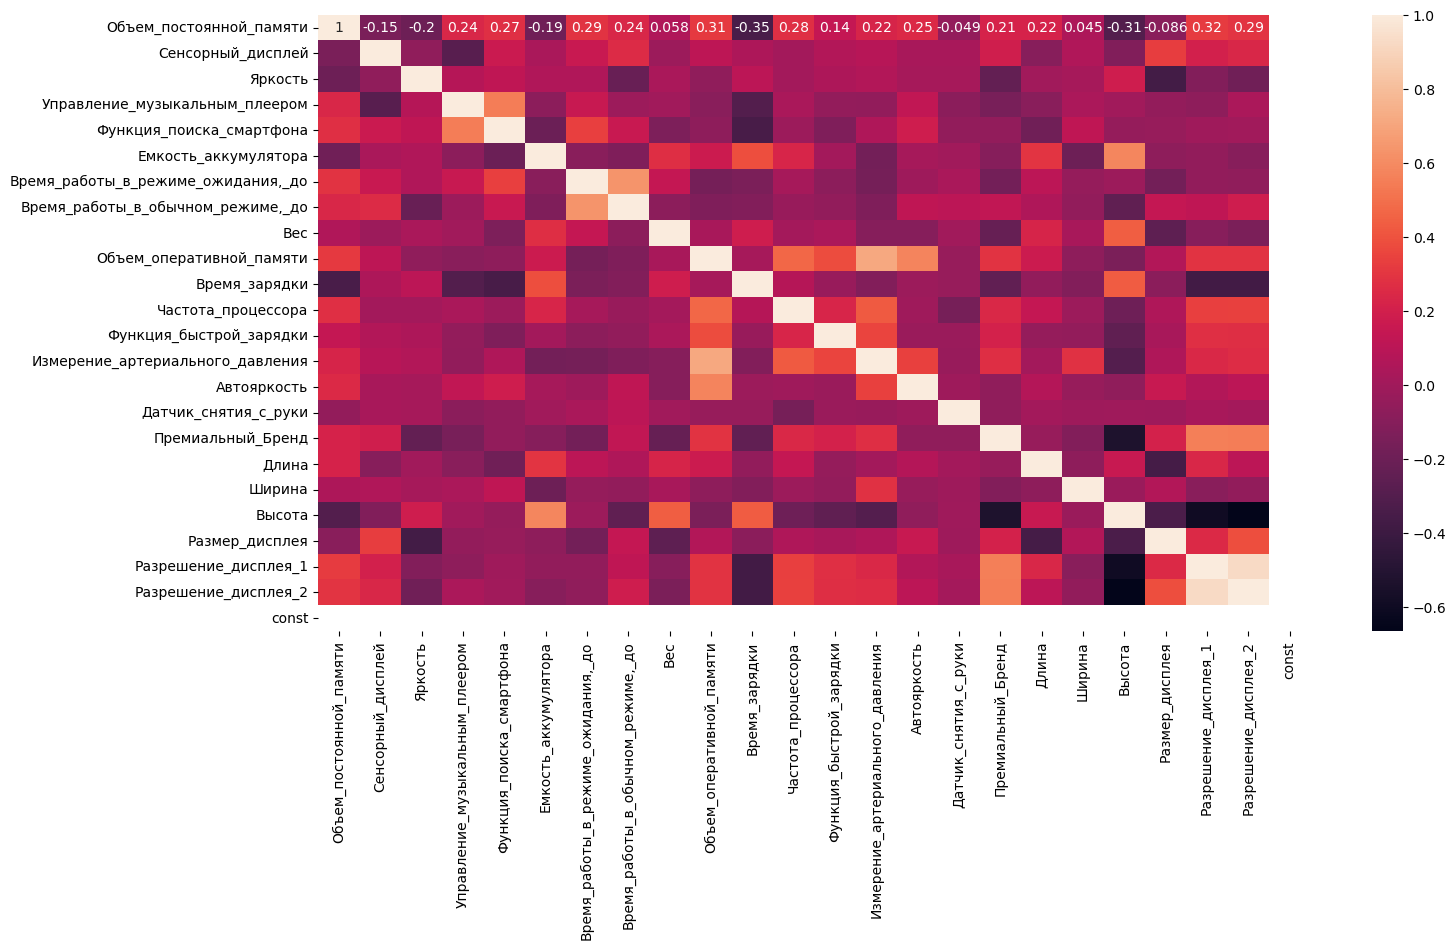

In [33]:
df_corr = X.corr()

plt.figure(figsize = (16, 8))
sns.heatmap(df_corr, annot=True);

Не наблюдается высокая корреляция. Проверим более точно наличие мультиколлинеарности с помощью $VIF$. Для этого оценим несколько моделей, беря по очереди в качестве объясняемой переменной один из количественных переменных. Далее будем считать $R^2_j$ этих моделей и с помощью него считать $ VIF(X_j) $ по следующей формуле.

$$ VIF(X_j) = \frac{1}{1 - R^2_J} $$

Если $ VIF(X_j) $ > 10, то можно будет говорить о наличии мультиколлинеарности

In [34]:
for col in quant_var:
    model_vif = sm.OLS(X[col], X[['const'] + quant_var].drop(columns=col)).fit()
    R2_vif = model_vif.rsquared
    VIF = 1/(1 - R2_vif)
    print(f'VIF_{col} = {VIF:.3f}')
    if VIF > 10:
        print('Есть мультиколлинеарность')
    else:
        print('Нет мультиколлинеарности')
    print()

VIF_Объем_постоянной_памяти = 1.764
Нет мультиколлинеарности

VIF_Яркость = 1.385
Нет мультиколлинеарности

VIF_Емкость_аккумулятора = 2.673
Нет мультиколлинеарности

VIF_Время_работы_в_режиме_ожидания,_до = 2.354
Нет мультиколлинеарности

VIF_Время_работы_в_обычном_режиме,_до = 2.332
Нет мультиколлинеарности

VIF_Вес = 1.477
Нет мультиколлинеарности

VIF_Объем_оперативной_памяти = 1.546
Нет мультиколлинеарности

VIF_Время_зарядки = 1.630
Нет мультиколлинеарности

VIF_Частота_процессора = 1.673
Нет мультиколлинеарности

VIF_Длина = 1.656
Нет мультиколлинеарности

VIF_Ширина = 1.127
Нет мультиколлинеарности

VIF_Высота = 4.677
Нет мультиколлинеарности

VIF_Размер_дисплея = 1.918
Нет мультиколлинеарности

VIF_Разрешение_дисплея_1 = 8.602
Нет мультиколлинеарности

VIF_Разрешение_дисплея_2 = 10.100
Есть мультиколлинеарность



Ввиду того, что мультиколлинеарности совсем не обнаружено, то нет причин применять МГК, так как данный метод в основном используется для борьбы с мультиколлинеарностью. Кроме того, МГК может использоваться просто для уменьшения числа переменных. В данной модели переменных и так мало, поэтому МГК снова не актуален. В данной модели ощутимой пользы от применения МГК не будет, при этом переменные могут перестать быть легко интерпретируемыми. Кроме того, у нас 4 регрессора - это дамми-переменные, что также может привести к тому, что МГК здесь применять неуместно. Поэтому здесь *не имеет смысла применять МГК*. 

### 4) Эндогенность

Для начала посмотрим на то, какая переменная имеет наивысшую корреляцию с ценой часов, что может говорить о двусторонней связи между ценой и данным параметром

In [35]:
df.iloc[:, :-2].corr()['Цена']

Цена                                  1.000000
Объем_постоянной_памяти               0.378103
Сенсорный_дисплей                    -0.352132
Яркость                               0.102543
Управление_музыкальным_плеером        0.386662
Функция_поиска_смартфона              0.282934
Емкость_аккумулятора                  0.012325
Время_работы_в_режиме_ожидания,_до    0.350514
Время_работы_в_обычном_режиме,_до     0.001261
Вес                                   0.351708
Объем_оперативной_памяти             -0.042246
Время_зарядки                        -0.170433
Частота_процессора                    0.100496
Функция_быстрой_зарядки              -0.012298
Измерение_артериального_давления     -0.053347
Автояркость                          -0.030474
Датчик_снятия_с_руки                 -0.058696
Премиальный_Бренд                    -0.146223
Длина                                 0.245203
Ширина                               -0.165081
Высота                                0.020497
Размер_диспле

Как видим, объём постоянной памяти имеет самую большую корреляцию с ценой. Возможно, логика заключается в том, что большой объем памяти и делает цену такой высокой. С другой же стороны, завышенная цена позволяет производителю производить смарт часы с большей памятью. Поэтому эндогенность данной регрессора данной переменной.

In [36]:
df.iloc[:, :-2].corr()['Объем_постоянной_памяти']

Цена                                  0.378103
Объем_постоянной_памяти               1.000000
Сенсорный_дисплей                    -0.139195
Яркость                              -0.253908
Управление_музыкальным_плеером        0.272489
Функция_поиска_смартфона              0.239488
Емкость_аккумулятора                 -0.158792
Время_работы_в_режиме_ожидания,_до    0.260617
Время_работы_в_обычном_режиме,_до     0.212924
Вес                                   0.081127
Объем_оперативной_памяти              0.353001
Время_зарядки                        -0.374287
Частота_процессора                    0.231735
Функция_быстрой_зарядки               0.163582
Измерение_артериального_давления      0.261002
Автояркость                           0.226725
Датчик_снятия_с_руки                 -0.023586
Премиальный_Бренд                     0.237464
Длина                                 0.082214
Ширина                                0.078020
Высота                               -0.058632
Размер_диспле

Получили, что объём оперативной памяти сильно коррелирует с постоянной памятью. Проверим есть ли сильная корреляция между объёмом оперативной памяти и постоянной памяти

In [37]:
print(f'Корреляция оперативной памятью и ценой часов:', round(df.iloc[:, :-2].corr()['Объем_оперативной_памяти']['Цена'], 3))

Корреляция оперативной памятью и ценой часов: -0.042


**Вывод:** Как видим, оперативная память слабо коррелируют с ценой. В связи с этим, для IV мы можем в качестве инструмента объём оперативной памяти. Для дальнейшего сравнения моделей, сравним OLS без инструментальной переменной, а затем IV с инструментальной переменной

#### OLS

In [38]:
X_ols = X.drop(columns='Объем_оперативной_памяти')
 
# Оценим регрессию
model_ols = sm.OLS(ln_y, X_ols).fit()
 
# Вывод результатов
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     47.27
Date:                Fri, 10 May 2024   Prob (F-statistic):           1.10e-61
Time:                        21:49:36   Log-Likelihood:                -136.65
No. Observations:                 197   AIC:                             319.3
Df Residuals:                     174   BIC:                             394.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Объе

### IV

In [39]:
X_iv = X.drop(columns='Объем_постоянной_памяти')

# Оценим регрессию на объём постоянной памяти
model_memory_iv = sm.OLS(X['Объем_постоянной_памяти'], X_iv).fit()
X_iv['Оценка постоянной памяти'] = model_memory_iv.fittedvalues
X_iv.drop(columns='Объем_оперативной_памяти', inplace=True)
 
# # Оценим регрессию
model_iv = sm.OLS(ln_y, X_iv).fit()
 
# Вывод результатов
print(model_iv.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     45.38
Date:                Fri, 10 May 2024   Prob (F-statistic):           2.15e-60
Time:                        21:49:37   Log-Likelihood:                -140.08
No. Observations:                 197   AIC:                             326.2
Df Residuals:                     174   BIC:                             401.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Сенс

#### Релевантность и валидность

Протестируем сначала на валидность с помощью теста Хаусмана. Проверяется гипотеза

$$ H_{0}: p\lim_{n \rightarrow \infty} \frac{X' \epsilon}{n} = 0 $$
$$ H_{1}: невалидность \quad инструмента $$

Статистика при верной нулевой гипотезе распределена так:

$$ \eta = (\hat\beta_{IV} - \hat\beta_{OLS})' \cdot (V(\hat\beta_{IV}) - V(\hat\beta_{OLS}))^{-1} \cdot (\hat\beta_{IV} - \hat\beta_{OLS}) \sim \chi^2_k $$

Теперь считаем

In [40]:
# Беты в моделях
beta_ols = model_ols.params.values
beta_iv = model_iv.params.values

# Ковариационные матрицы в моделях
Var_iv = model_iv.cov_params().values
Var_ols = model_ols.cov_params().values

# Расчёт статистики
chi_obs = ((beta_iv - beta_ols).reshape(1, -1) @ np.linalg.inv(Var_iv - Var_ols) @ (beta_iv - beta_ols)).item()

print(f'chi_obs = {chi_obs:.3f}')
print(f'pvalue = {(1 - chi2.cdf(chi_obs, df = 16)):.3f}')
hyph_check(pvalue)

chi_obs = 500.677
pvalue = 0.000
Нулевая гипотеза отвергается


**Вывод:** pvalue < 5%, значит мы принимаем гипотезу о невалидности инструмента или эндогенности регрессора

Теперь проверим релевантность. Посчитаем F-статистику первого шага. Если она будет больше 10, то инструмент сильный (сильно коррелирует с X)

In [41]:
print(f'F_statistics = {model_memory_iv.fvalue:.3f}')

F_statistics = 9.701


**Вывод:** К сожалению, наш выбранный инструмент оказались невалидным и слабо коррелирующим с X. Это наталкивает на вывод, что в модели нет эндогенности. Сравним результаты моделей IV и нашей модели OLS.

In [42]:
# Для обычного OLS
print(f'OLS: R2 = {model.rsquared:.3f}')
print(f'OLS: AIC = {model.aic:.3f}')
print(f'OLS: BIC = {model.bic:.3f}')
print()

# Для IV
print(f'IV: R2 = {model_iv.rsquared:.3f}')
print(f'IV: AIC = {model_iv.aic:.3f}')
print(f'IV: BIC = {model_iv.bic:.3f}')

OLS: R2 = 0.858
OLS: AIC = 319.445
OLS: BIC = 398.242

IV: R2 = 0.852
IV: AIC = 326.169
IV: BIC = 401.682


**Вывод:** Как видим, IV модель показывает результат даже хуже, чем модель без инструментальных переменных. Оставляем старую модель, и считаем что наш X - экзогенный

## Нормальность распредеделения случайной ошибки

Для начала посмотрим на гистограмму распределения остатков

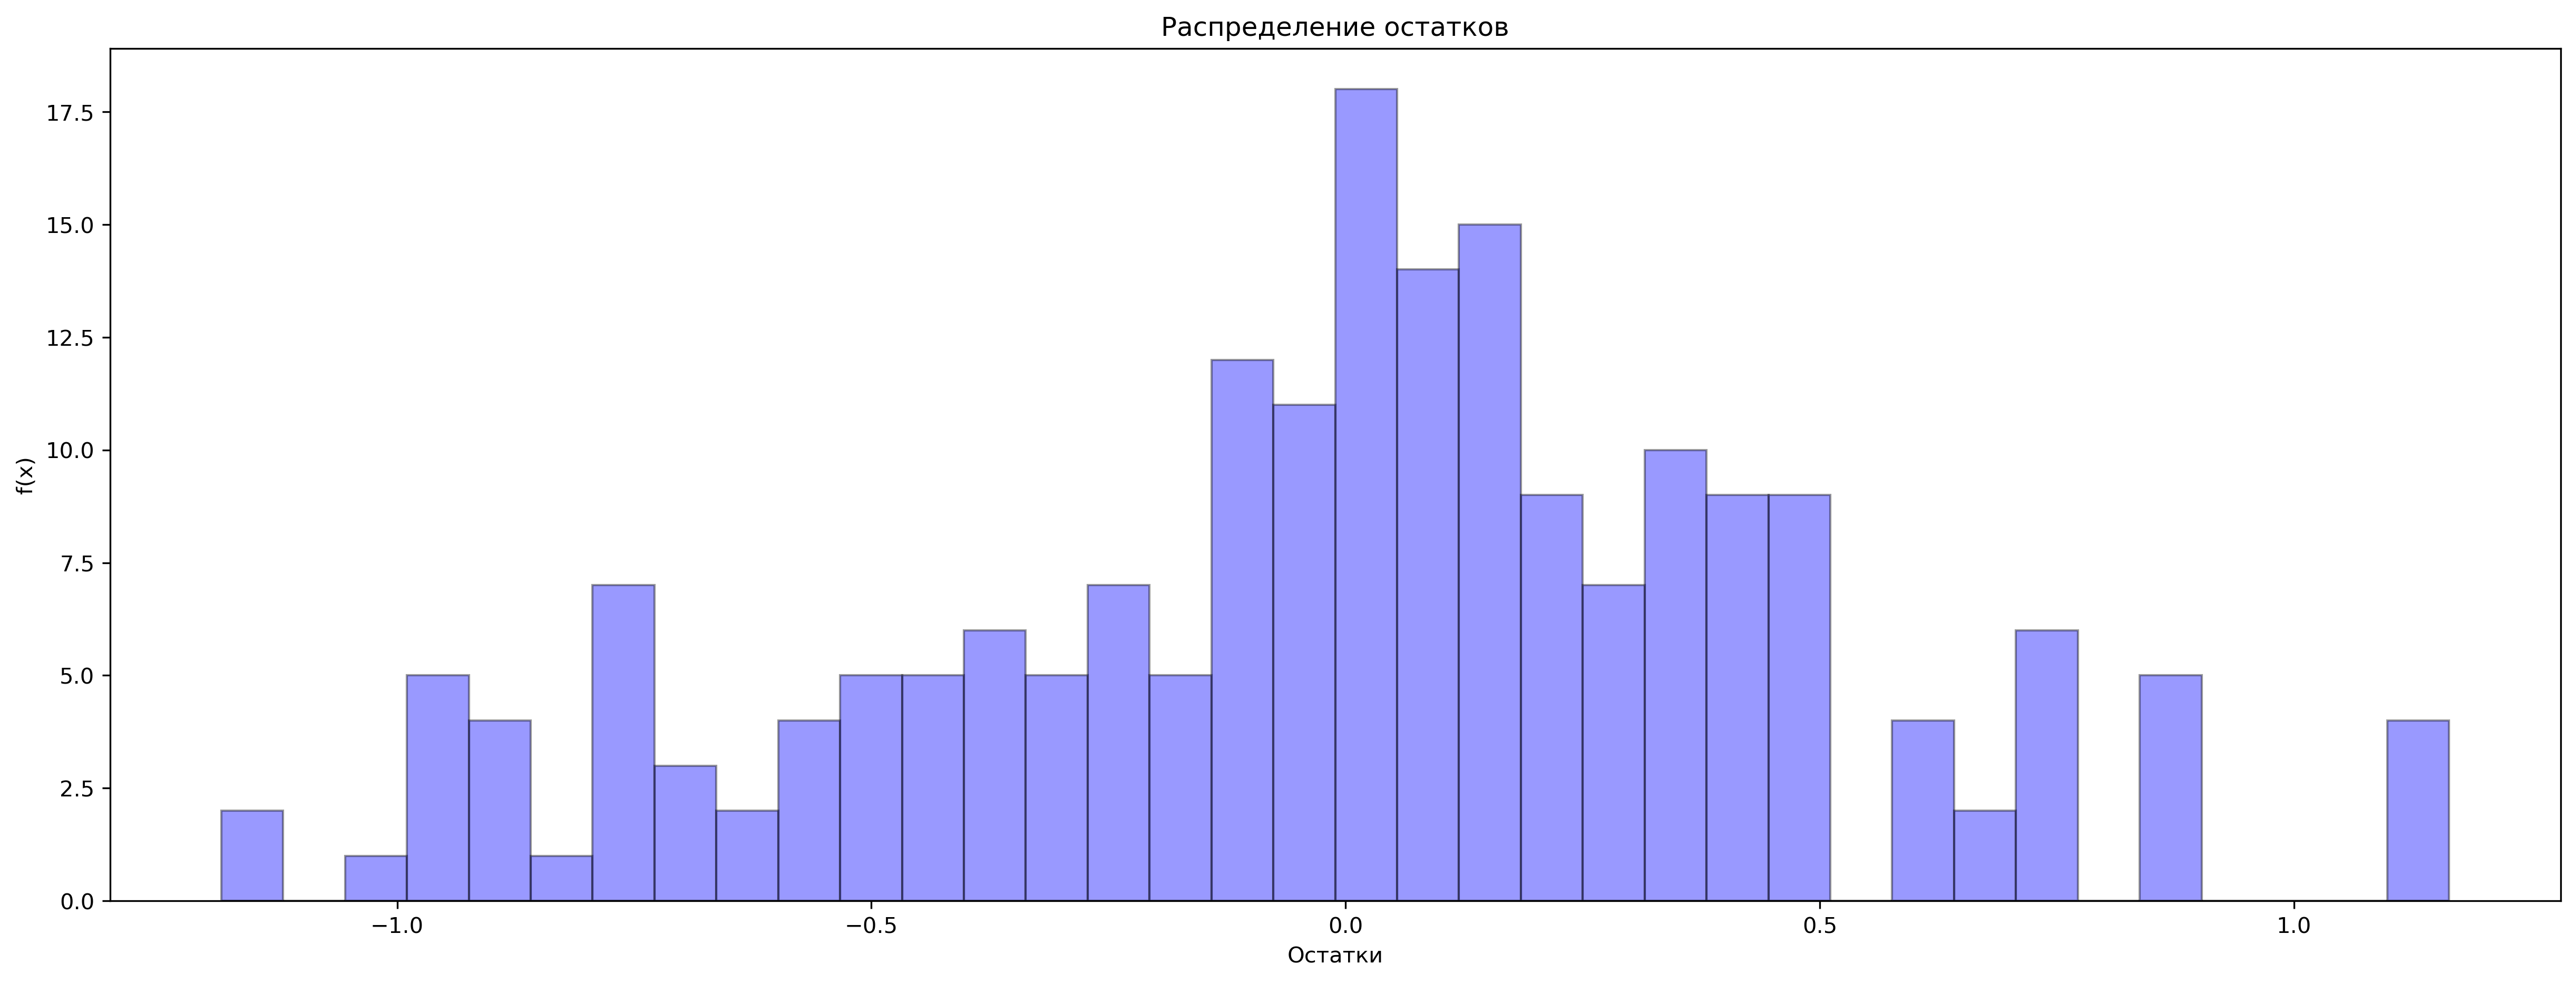

In [43]:
e = model.resid

# Гистограмма
plt.figure(figsize = (20,7), dpi = 300)
sns.distplot(e, hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.xlabel('Остатки')
plt.ylabel('f(x)')
plt.title('Распределение остатков');

В целом, распределение похоже на нормальное. Проверим гипотезу на нормальность с помощью теста Харке-Бера:

$$ H0: S = 0, K = 3 $$
$$ H1: S \neq 0, K \neq 3 $$

Статистика 

$$
JB = n (\frac{S^3}{6} + \frac{(K-3)^2}{24}) \sim \chi^2_{2}
$$

In [44]:
from scipy.stats import skew, kurtosis

sk = skew(e)
kurt = kurtosis(e, fisher=False)

JB = X.shape[0] * ((sk**2)/6 + ((kurt - 3)**2)/24)
print(f'JB = {round(JB, 2)}')

xi_crit = chi2.ppf(0.95, 2) # критическое значение
print("Критическое значение статистики =", round(xi_crit, 2))

JB = 0.85
Критическое значение статистики = 5.99


**Вывод:** Значение статистики меньше критического значения, значит нулевая гипотеза не отвергается, значит остатки распределены нормально

## Значимость коэффициентов и модели в целом

Мы получили финальную модель и доказали, почему выбрали именно ее на каждом шаге. Теперь посмотрим на значимость коэффициентов модели и самой модели в целом

In [45]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     7937.
Date:                Fri, 10 May 2024   Prob (F-statistic):          9.86e-249
Time:                        21:49:39   Log-Likelihood:                -135.72
No. Observations:                 197   AIC:                             319.4
Df Residuals:                     173   BIC:                             398.2
Df Model:                          23                                         
Covariance Type:                  HC3                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Объе

Гипотеза о незначимости признака:
$$ H_0: \beta = 0 $$ 
$$ H_1: \beta \ne 0 $$


Далее во всех заданиях мы возьмем уровень значимости $ \alpha = 5\% $

In [46]:
for col, pvalue in zip(X.columns, model.pvalues):
    print(f'Для переменной {col} pvalue = {round(pvalue, 3)}')
    hyph_check(pvalue)
    print()

Для переменной Объем_постоянной_памяти pvalue = 0.021
Нулевая гипотеза отвергается

Для переменной Сенсорный_дисплей pvalue = 0.0
Нулевая гипотеза отвергается

Для переменной Яркость pvalue = 0.128
Нулевая гипотеза не отвергается. 

Для переменной Управление_музыкальным_плеером pvalue = 0.009
Нулевая гипотеза отвергается

Для переменной Функция_поиска_смартфона pvalue = 0.0
Нулевая гипотеза отвергается

Для переменной Емкость_аккумулятора pvalue = 0.388
Нулевая гипотеза не отвергается. 

Для переменной Время_работы_в_режиме_ожидания,_до pvalue = 0.0
Нулевая гипотеза отвергается

Для переменной Время_работы_в_обычном_режиме,_до pvalue = 0.064
Нулевая гипотеза не отвергается. 

Для переменной Вес pvalue = 0.072
Нулевая гипотеза не отвергается. 

Для переменной Объем_оперативной_памяти pvalue = 0.214
Нулевая гипотеза не отвергается. 

Для переменной Время_зарядки pvalue = 0.352
Нулевая гипотеза не отвергается. 

Для переменной Частота_процессора pvalue = 0.127
Нулевая гипотеза не отвергае

Теперь финально проверим адекватность модели в целом с помощью F-теста

Сформулируем гипотезу
$$
\begin{aligned}
& H_0: \beta_{2} = \beta_{3} = \beta_{4} = \beta_{5} = ... = \beta_{k} = 0 \\
& H_1: \beta_{2}^2 + \beta_{3}^2 + \beta_{4}^2 + \beta_{5}^2 + ... +\beta_{k}^2 \neq 0
\end{aligned}
$$

Проверим эту гипотезу с помощью F-теста. Для этого рассчитаем F-статистику по следующей формуле

$ F_{obs} = \frac{R^2/(k - 1)}{(1 - R^2)/(n - k)} = \frac{R^2/23}{(1 - R^2)/173} $

Если $ H_0 $ верна, то $ F_{obs} \sim F_{23, 173}$

In [47]:
R2 = model.rsquared
F_obs = (R2/23)/((1 - R2)/(173))
pvalue = round(1 - f.cdf(x=F_obs, dfn=23, dfd=173), 3)


print(f'F_obs = {F_obs:.4}')
print(f'pvalue = {pvalue}')

if pvalue > 0.05:
    print(f'H0 не отвергается. Модель неадекватна')
else:
    print(f'H0 отвергается. Модель адекватна')

F_obs = 45.45
pvalue = 0.0
H0 отвергается. Модель адекватна


## Квантильная регрессия

## Прогнозирование цены для собственного товара

Для прогнозирования будем использовать лучшую модель, которая у нас получилось. Придумаем новые часы

In [49]:
new_watches = {
    'Объем_постоянной_памяти': [16],
    'Сенсорный_дисплей': [1],
    'Яркость': [2000],
    'Управление_музыкальным_плеером': [0],
    'Функция_поиска_смартфона': [1],
    'Емкость_аккумулятора': [500],
    'Время_работы_в_режиме_ожидания,_до': [60],
    'Время_работы_в_обычном_режиме,_до': [25],
    'Вес': [150],
    'Объем_оперативной_памяти': [32],
    'Время_зарядки': [120],
    'Частота_процессора': [650],
    'Функция_быстрой_зарядки': [1],
    'Измерение_артериального_давления': [0],
    'Автояркость': [1],
    'Датчик_снятия_с_руки': [1],
    'Премиальный_Бренд': [1],
    'Длина': [45],
    'Ширина': [40],
    'Высота': [12],
    'Размер_дисплея': [1.45],
    'Разрешение_дисплея_1': [400],
    'Разрешение_дисплея_2': [450],
    'const': [1]
}


new_watches = pd.DataFrame(new_watches)

In [50]:
pred = pd.DataFrame(model.t_test(new_watches).summary()).iloc[1, 1]
CI_left = pd.DataFrame(model.t_test(new_watches).summary()).iloc[1, 5]
CI_right = pd.DataFrame(model.t_test(new_watches).summary()).iloc[1, 6]

print(f'Предсказание = {pred}') 
print(f'left_CI = {CI_left}')
print(f'right_CI = {CI_right}') 

Предсказание =    10.2512
left_CI =     8.139
right_CI =    12.363


Выше значения в логарифмах. Без логарифма получаем следующие значения

In [51]:
pred = np.exp(10.2512)
CI_left = np.exp(8.139)
CI_right = np.exp(12.363)

print(f'Предсказание = {round(pred, 2)}') 
print(f'CI = [{round(CI_left, 2)}, {round(CI_right, 2)}]') 

Предсказание = 28316.5
CI = [3425.49, 233982.12]
